In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.2 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 21.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138888 sha256=64216e9857c69c43e030fe56362cfd6be73fac55f6633ea2a84e960296c751b5
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/dd/16/8f/bdde4dfda69996dc9e226111ccfd4a4d247cb61b42a237c3cc
Successfully built peewee
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
Question 1: Use yfinance to Extract Stock Data

In [6]:
ticker_tesla = yf.Ticker('TSLA')

In [7]:
tesla_data = ticker_tesla.history(period ='max')

In [8]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
Question 2: Use Webscraping to Extract Tesla Revenue Data

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla revenue data
URL_tesla = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Fetch the HTML data
html_data_tesla = requests.get(URL_tesla).text

# Parse the HTML data with BeautifulSoup
soup_tesla = BeautifulSoup(html_data_tesla, 'html.parser')

# Find the second table in the HTML (assuming it contains the revenue data)
table = soup_tesla.find_all('table')[1]

# Extract rows from the table, skipping the header row
rows = table.find_all('tr')[1:]
data = []

# Extract date and revenue data from each row
for row in rows:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append([date, revenue])

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Clean and convert the 'Revenue' column to numeric, handling non-numeric entries
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Display the last few rows of the DataFrame
tesla_revenue.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [ ]:
Question 3: Use yfinance to Extract Stock Data

In [16]:
# Fetch GameStop ticker data
ticker_gamestop = yf.Ticker('GME')
gme_data = ticker_gamestop.history(period='max')

# Reset index to make the Date column a regular column
gme_data.reset_index(inplace=True)

# Display the first few rows of the data
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
Question 4: Use Webscraping to Extract GME Revenue Data

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GME revenue data
URL_gme = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Fetch the HTML data
html_data_2 = requests.get(URL_gme).text

# Parse the HTML data with BeautifulSoup
soup_gme = BeautifulSoup(html_data_2, 'html.parser')

# Find the second table in the HTML (assuming it contains the revenue data)
table_2 = soup_gme.find_all('table')[1]

# Extract rows from the table, skipping the header row
rows = table_2.find_all('tr')[1:]
data = []

# Extract date and revenue data from each row
for row in rows:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append([date, revenue])

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Clean and convert the 'Revenue' column to numeric, handling non-numeric entries
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Display the last few rows of the DataFrame
print(gme_revenue.tail())


          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


In [ ]:
Question 5: Plot Tesla Stock Graph

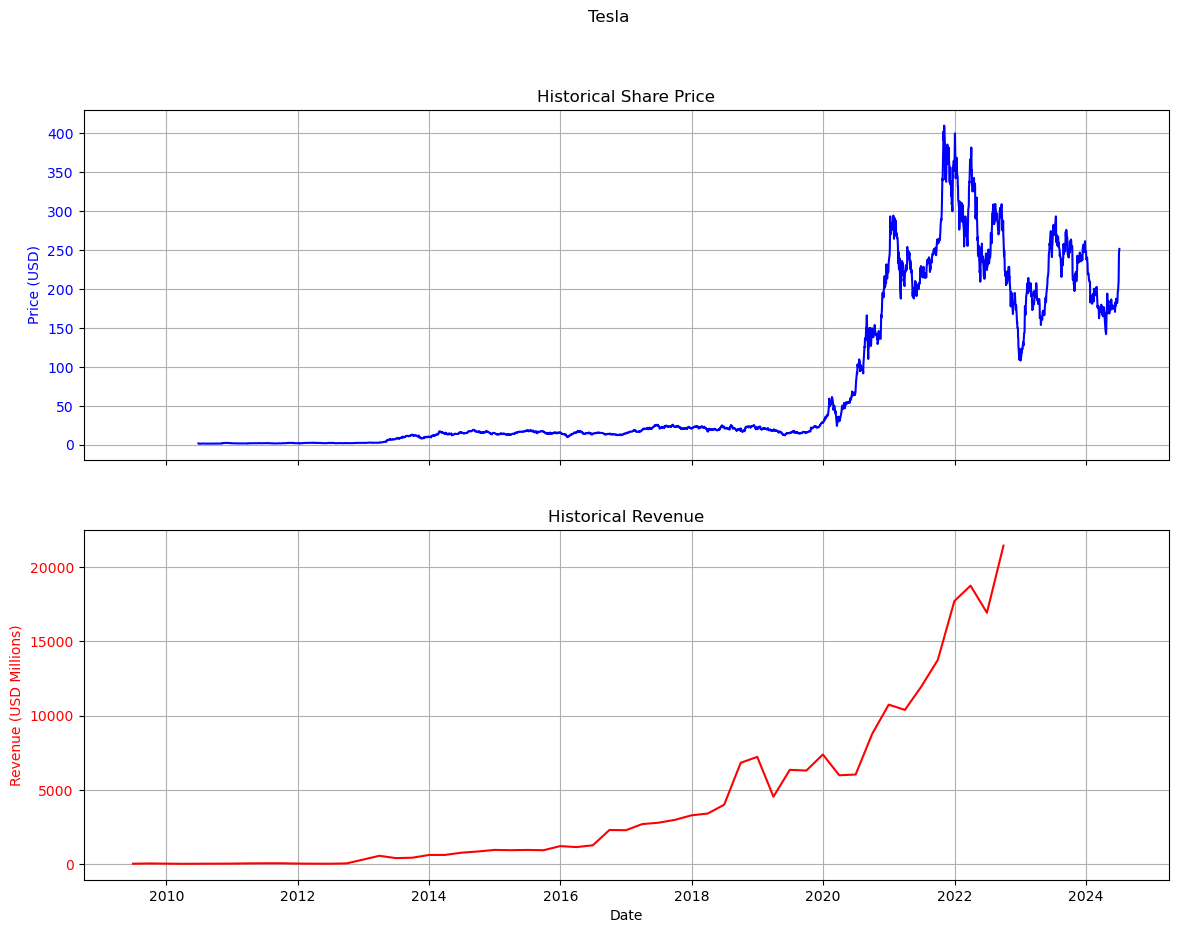

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for Tesla revenue data
URL_tesla = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Fetch the HTML data
html_data_tesla = requests.get(URL_tesla).text

# Parse the HTML data with BeautifulSoup
soup_tesla = BeautifulSoup(html_data_tesla, 'html.parser')

# Find the second table in the HTML (assuming it contains the revenue data)
table = soup_tesla.find_all('table')[1]

# Extract rows from the table, skipping the header row
rows = table.find_all('tr')[1:]
data = []

# Extract date and revenue data from each row
for row in rows:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append([date, revenue])

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Clean and convert the 'Revenue' column to numeric, handling non-numeric entries
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Convert the Date column to datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Using yfinance to get Tesla stock data
import yfinance as yf

ticker_tesla = yf.Ticker('TSLA')
tesla_data = ticker_tesla.history(period='max')

# Reset index to make the Date column a regular column
tesla_data.reset_index(inplace=True)

# Plotting the graphs
def make_graph(stock_data, revenue_data, title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Plot stock data (closing prices) on the first subplot
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Close Price')
    ax1.set_ylabel('Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('Historical Share Price')
    ax1.grid(True)

    # Plot revenue data on the second subplot
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label='Revenue')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue (USD Millions)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_title('Historical Revenue')
    ax2.grid(True)

    # Add a title and show the plot
    fig.suptitle(title)
    plt.show()

# Generate the graph
make_graph(tesla_data, tesla_revenue, 'Tesla')


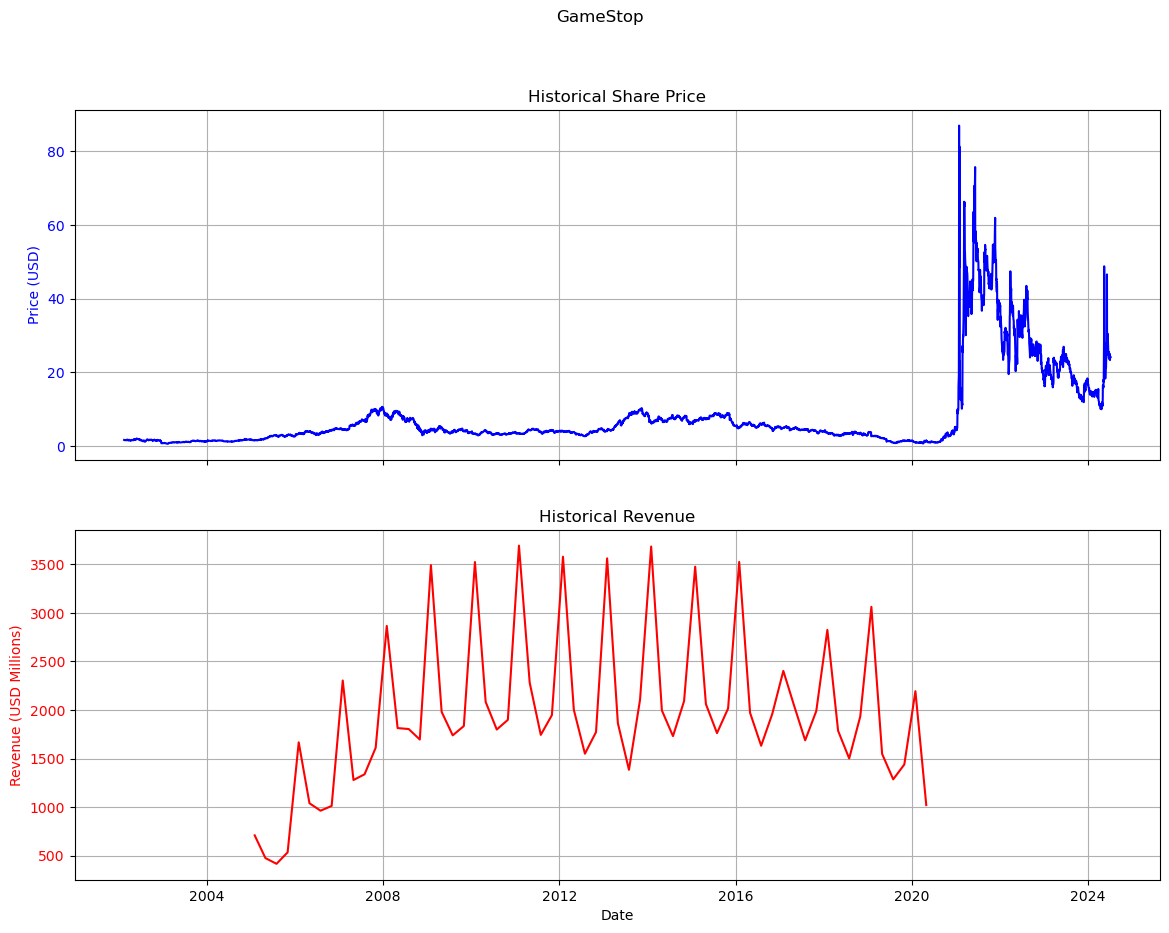

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Obtener datos históricos de acciones de GameStop utilizando yfinance
ticker_gamestop = yf.Ticker('GME')
gme_data = ticker_gamestop.history(period='max')

# Resetear el índice para hacer que la columna Date sea una columna regular
gme_data.reset_index(inplace=True)

# URL para los datos de ingresos de GameStop
URL_gme = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Obtener los datos HTML
html_data_gme = requests.get(URL_gme).text

# Parsear los datos HTML con BeautifulSoup
soup_gme = BeautifulSoup(html_data_gme, 'html.parser')

# Encontrar la segunda tabla en el HTML (suponiendo que contiene los datos de ingresos)
table = soup_gme.find_all('table')[1]

# Extraer las filas de la tabla, omitiendo la fila del encabezado
rows = table.find_all('tr')[1:]
data = []

# Extraer los datos de fecha e ingresos de cada fila
for row in rows:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append([date, revenue])

# Crear un DataFrame con los datos extraídos
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Limpiar y convertir la columna 'Revenue' a numérica, manejando entradas no numéricas
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Convertir la columna Date a formato datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Función para generar los gráficos
def make_graph(stock_data, revenue_data, title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Graficar datos de acciones (precios de cierre) en el primer subplot
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Close Price')
    ax1.set_ylabel('Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('Historical Share Price')
    ax1.grid(True)

    # Graficar datos de ingresos en el segundo subplot
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label='Revenue')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue (USD Millions)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_title('Historical Revenue')
    ax2.grid(True)

    # Agregar un título y mostrar el gráfico
    fig.suptitle(title)
    plt.show()

# Generar los gráficos
make_graph(gme_data, gme_revenue, 'GameStop')
